In [1]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

from __future__ import print_function

from matplotlib import rcParams
rcParams["savefig.dpi"] = 200
rcParams["font.size"] = 8

# Create numpy region mask

In this tutorial we will show how to create a mask for arbitrary latitude and longitude grids.

Import regionmask and check the version:

In [2]:
import regionmask
regionmask.__version__

'0.9.0'

We define a lon/ lat grid with a 1° grid spacing, where the points define the middle of the grid. Additionally we create a grid that spans the edges of the grid for the plotting. 

In [3]:
# define a longitude latitude grid
lon = np.arange(-179.5, 180)
lat = np.arange(-89.5, 90)

# for the plotting
lon_edges = np.arange(-180, 181)
lat_edges = np.arange(-90, 91)

Again we use the SREX regions. Using `xarray=False` tells the code to output to a numpy array.

In [4]:
mask = regionmask.srex.mask(lon, lat, xarray=False)

`mask` is now a `n_lon x n_lat` numpy array. Gridpoints that do not fall in a region are NaN, the gridpoints that fall in a region are encoded with the number of the region (here 1 to 26).

The function `mask` determines if all cominations of points given in `lon` and `lat` lies within the polygon making up the region.

We can now plot the `mask`:

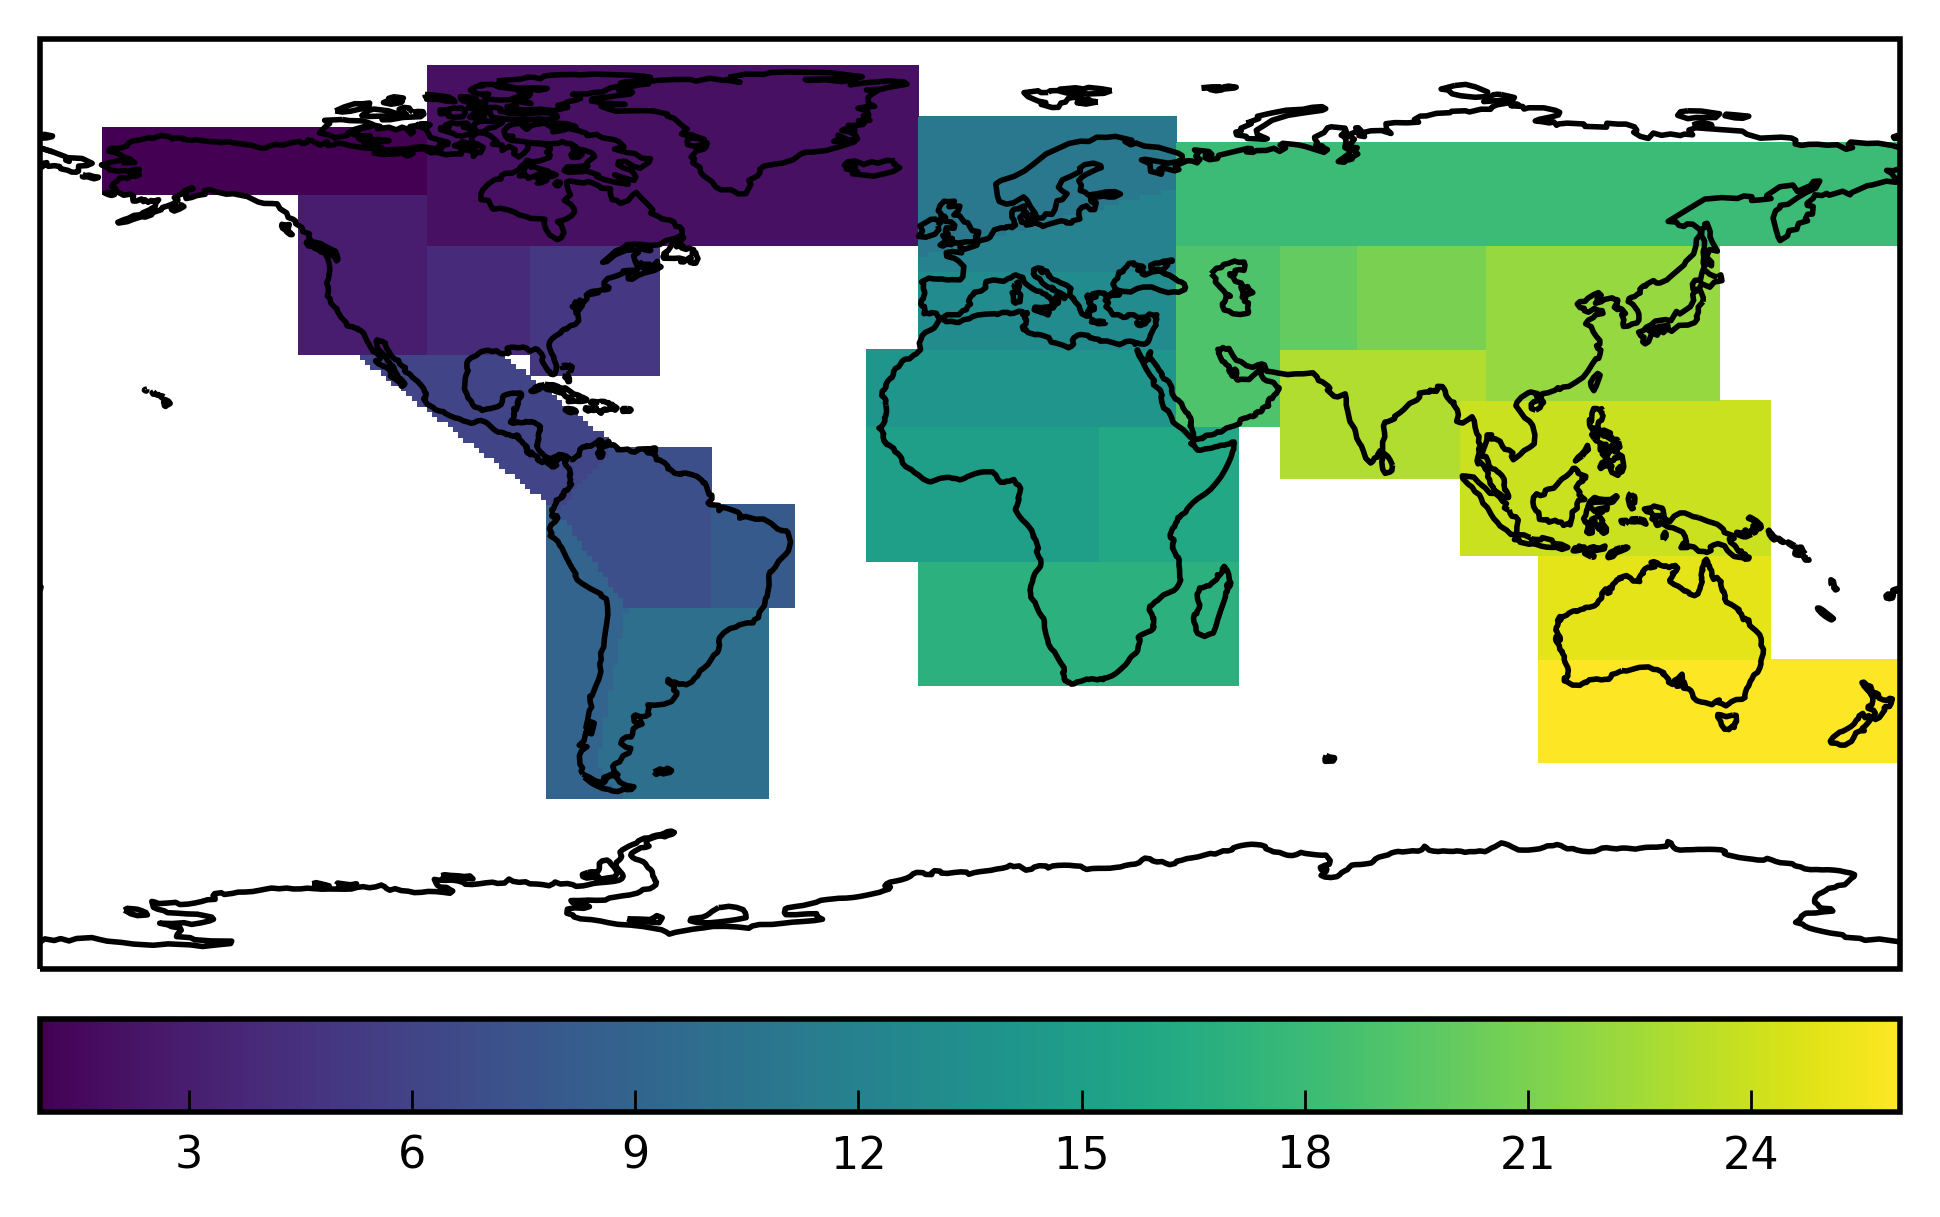

In [6]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

ax = plt.subplot(111, projection=ccrs.PlateCarree())
# pcolormesh does not handle NaNs, requires masked array
mask_ma = np.ma.masked_invalid(mask)

h = ax.pcolormesh(lon_edges, lat_edges, mask_ma, transform=ccrs.PlateCarree(), cmap='viridis')

ax.coastlines()

plt.colorbar(h, orientation='horizontal', pad=0.04);

Finally the `mask` can now be used to mask out all data that is not in a specific region.

In [7]:
# create random data
data = np.random.randn(*lat.shape + lon.shape)

# only retain data in the Central Europe
data_ceu = np.ma.masked_where(mask != 12, data)

Plot the selected data

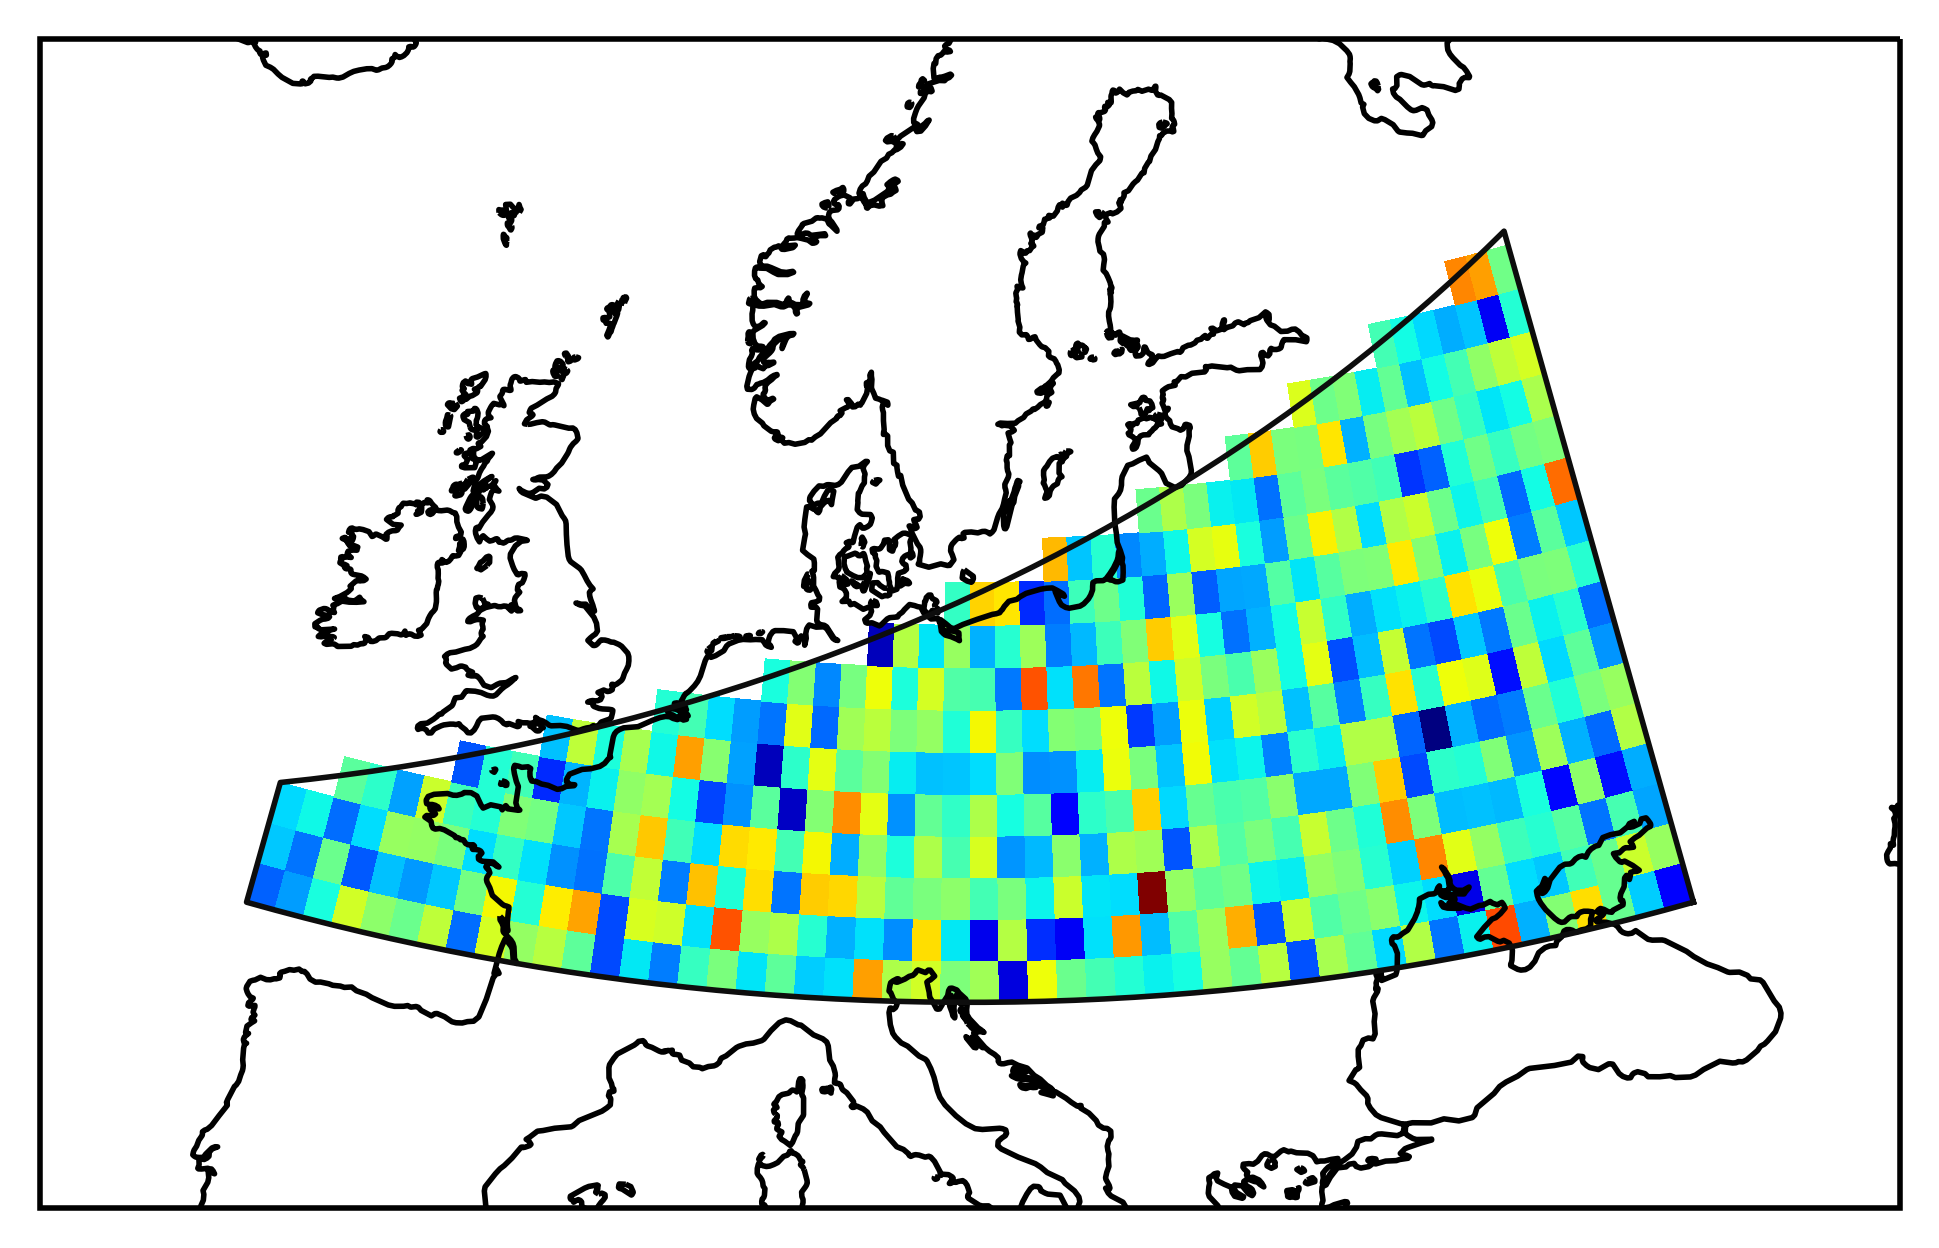

In [8]:
# load cartopy
import cartopy.crs as ccrs

# choose a good projection for regional maps
proj=ccrs.LambertConformal(central_longitude=15)

# plot the outline of the central European region
ax = regionmask.srex.plot(regions=12, add_ocean=False, resolution='50m',
                          proj=proj, add_label=False)

ax.pcolormesh(lon_edges, lat_edges, data_ceu, transform=ccrs.PlateCarree())

# fine tune the extent
ax.set_extent([-15, 45, 40, 65], crs=ccrs.PlateCarree())

Finally we can obtain the region mean:

In [9]:
print('Global mean:   ', np.mean(data))
print('Central Europe:', np.mean(data_ceu))

Global mean:    0.00508462928478
Central Europe: 0.033885820489


## Create a mask with a different lon/ lat grid

The interesting thing of `gridmask` is that you can use any lon/ lat grid.

Use a 5° x 5° grid:

In [10]:
# define a longitude latitude grid
lon5 = np.arange(-177.5, 180, 5)
lat5 = np.arange(-87.5, 90, 5)

# for the plotting
lon5_edges = np.arange(-180, 181, 5)
lat5_edges = np.arange(-90, 91, 5)

mask5_deg = regionmask.srex.mask(lon5, lat5, xarray=False)

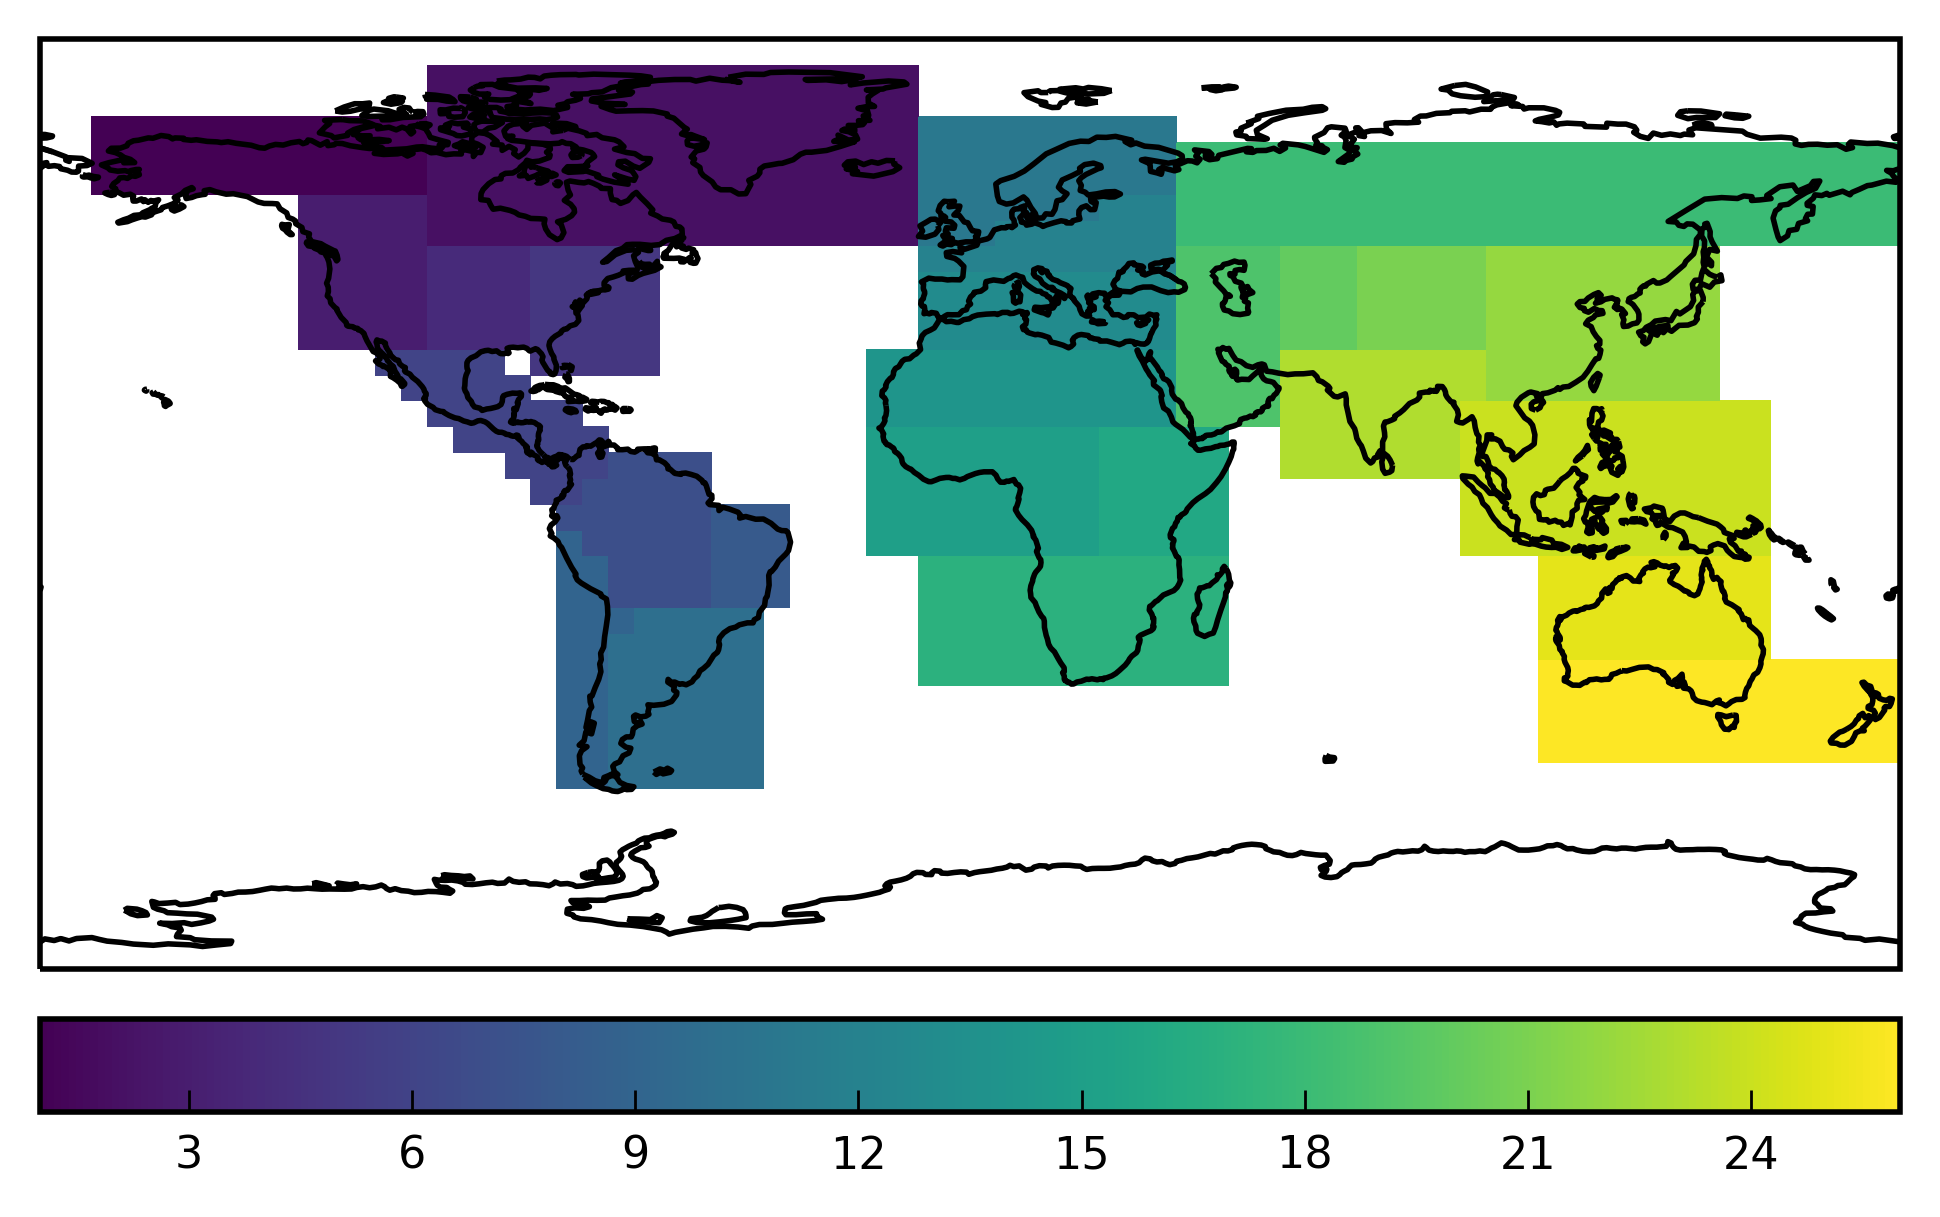

In [11]:
ax = plt.subplot(111, projection=ccrs.PlateCarree())
# pcolormesh does not handle NaNs, requires masked array
mask5_ma = np.ma.masked_invalid(mask5_deg)

h = ax.pcolormesh(lon5_edges, lat5_edges, mask5_ma, transform=ccrs.PlateCarree(), cmap='viridis')

ax.coastlines()

plt.colorbar(h, orientation='horizontal', pad=0.04);

Now the grid cells are much larger.